In [5]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9675

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Confusion Matrix:
 [[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   3    5 1335    4    5    1    9    8    8    2]
 [   1    0   23 136

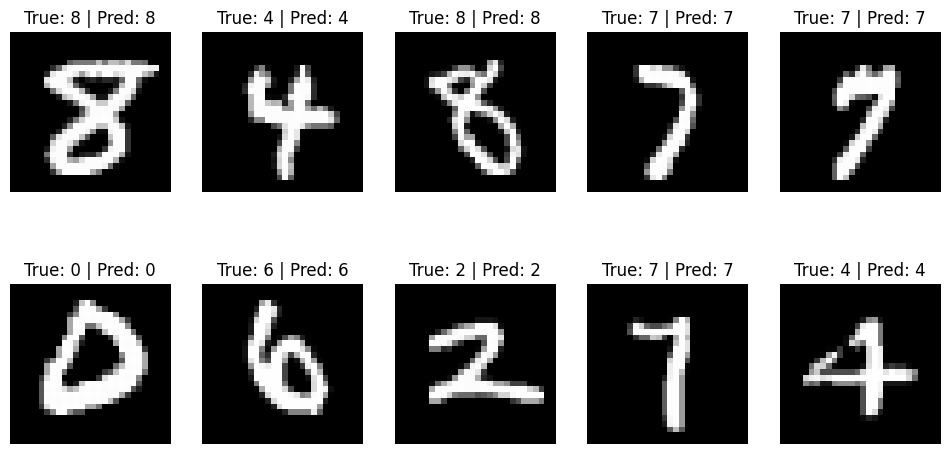

In [6]:
def display_sample_predictions(X, y, y_pred, sample_size=10):
    plt.figure(figsize=(12, 6))
    for i in range(sample_size):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y[i]} | Pred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

display_sample_predictions(X_test.to_numpy(), y_test.to_numpy(), y_pred, sample_size=10)